In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
data=pd.read_csv('Heart Disease data.csv')

In [9]:
df=data.copy()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
df.isnull().sum().sum()

0

In [13]:
#No missing value in data, let us chekc outlier

<Axes: >

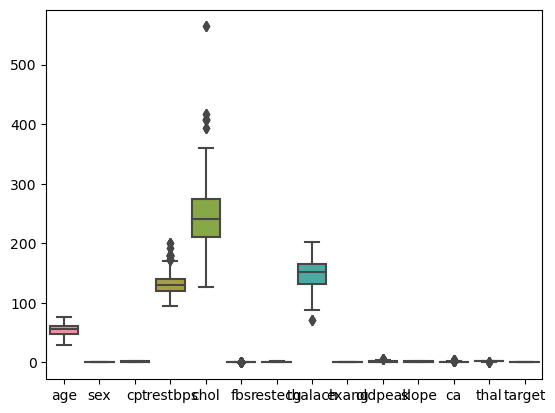

In [14]:
sns.boxplot(data=df)

In [9]:
#Some of the columns have outlier

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.436098,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.141463,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.071551,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,22.990115,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
#applying trimming

In [12]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
Upper_fence=Q3+1.5*IQR
Lower_fence=Q1-1.5*IQR
print("Upper fence \n",Upper_fence) 
print("Lower Fence \n" ,Lower_fence)

Upper fence 
 age          80.5
sex           2.5
cp            5.0
trestbps    170.0
chol        371.0
fbs           0.0
restecg       2.5
thalach     217.0
exang         2.5
oldpeak       4.5
slope         3.5
ca            2.5
thal          4.5
target        2.5
dtype: float64
Lower Fence 
 age          28.5
sex          -1.5
cp           -3.0
trestbps     90.0
chol        115.0
fbs           0.0
restecg      -1.5
thalach      81.0
exang        -1.5
oldpeak      -2.7
slope        -0.5
ca           -1.5
thal          0.5
target       -1.5
dtype: float64


In [13]:
df1=df[~((df<Lower_fence)|(df>Upper_fence)).any(axis=1)]

In [14]:
df1.shape   #from 1025 only 769 rows left so alot of data is missed so we avoid this aproach

(769, 14)

In [15]:
#capping approach

df2 = np.where(df < Lower_fence, Lower_fence,
                       np.where(df > Upper_fence, Upper_fence, df))

In [16]:
#capping gives np array so convert inro dataframe

df=pd.DataFrame(df2,columns=df.columns)

In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.0,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.436098,0.695610,0.942439,131.260488,244.981463,0.0,0.529756,149.180488,0.336585,1.062244,1.385366,0.694146,2.327317,0.513171
std,9.071551,0.460373,1.029641,16.532208,47.746162,0.0,0.527878,22.865470,0.472772,1.141865,0.617755,0.890414,0.609123,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.0,0.000000,81.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.0,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.0,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.0,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,371.000000,0.0,2.000000,202.000000,1.000000,4.500000,2.000000,2.500000,3.000000,1.000000


In [18]:
#the value for min max of columns have changed means capping applied successfully
#No label encoding required as all columns are already in numerical format

<Axes: >

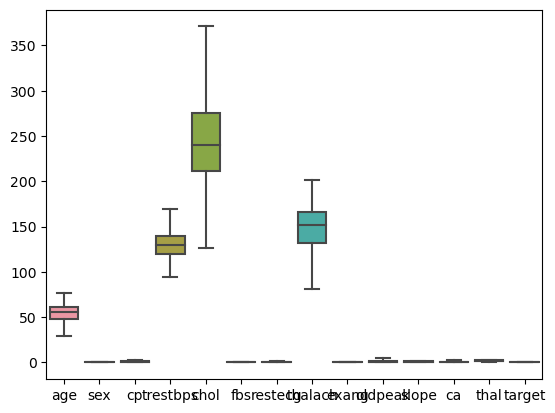

In [19]:
sns.boxplot(data=df)

In [20]:
#no more outliers in the cardio data
#so our preprocessing ends here

In [20]:
df.skew()

age        -0.249478
sex        -0.851449
cp          0.529455
trestbps    0.402284
chol        0.343813
fbs         0.000000
restecg     0.180440
thalach    -0.477793
exang       0.692655
oldpeak     1.019303
slope      -0.479134
ca          0.864726
thal       -0.375135
target     -0.052778
dtype: float64

In [21]:
df.kurt()               #the value for skew and kurtosis is in suitable range, so we can say data is normally distributed

age        -0.524644
sex        -1.277531
cp         -1.149500
trestbps   -0.133768
chol       -0.156721
fbs         0.000000
restecg    -1.309614
thalach    -0.238718
exang      -1.523205
oldpeak     0.260000
slope      -0.647129
ca         -0.741233
thal       -0.390878
target     -2.001123
dtype: float64

In [22]:
#checking for multi collinearity using corr. matrix

corr_matrix=df.corr()        # if data is normally distributed by default method= pearsons
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103574,-0.071960,0.278055,0.213494,NaN,-0.132515,-0.390618,0.088017,0.210338,-0.168905,0.320109,0.072317,-0.229133
sex,-0.103574,1.000000,-0.041119,-0.067713,-0.181965,NaN,-0.055117,-0.047748,0.139157,0.091250,-0.026666,0.101424,0.200669,-0.279501
cp,-0.071960,-0.041119,1.000000,0.047868,-0.097159,NaN,0.043581,0.306063,-0.401513,-0.172375,0.131633,-0.203497,-0.166900,0.434854
trestbps,0.278055,-0.067713,0.047868,1.000000,0.135275,NaN,-0.127729,-0.043414,0.046996,0.173377,-0.110336,0.103535,0.047238,-0.132301
chol,0.213494,-0.181965,-0.097159,0.135275,1.000000,NaN,-0.137856,-0.030446,0.083081,0.067534,-0.006644,0.101442,0.089409,-0.118254
fbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,-0.132515,-0.055117,0.043581,-0.127729,-0.137856,NaN,1.000000,0.051295,-0.065606,-0.050546,0.086086,-0.097487,-0.020449,0.134468
thalach,-0.390618,-0.047748,0.306063,-0.043414,-0.030446,NaN,0.051295,1.000000,-0.382152,-0.351921,0.395921,-0.230638,-0.102758,0.422509
exang,0.088017,0.139157,-0.401513,0.046996,0.083081,NaN,-0.065606,-0.382152,1.000000,0.317703,-0.267335,0.135755,0.203724,-0.438029
oldpeak,0.210338,0.091250,-0.172375,0.173377,0.067534,NaN,-0.050546,-0.351921,0.317703,1.000000,-0.573686,0.256080,0.201083,-0.442847


In [23]:
df['fbs'].value_counts()

0.0    1025
Name: fbs, dtype: int64

If all the values in a column are 0, it will result in a correlation matrix column filled with "NaN" (Not a Number) values. This occurs because the variance of that variable is zero, and the correlation calculation involves dividing by the standard deviations of the variables, resulting in undefined values.

While "NaN" values in the correlation matrix may be mathematically correct in this scenario, they can cause issues in subsequent calculations or analyses that rely on complete and valid correlation values. Therefore, it's generally a good practice to handle such situations appropriately.

Here are an option for handling columns with all-zero values:

Remove the column: If a column contains all zeros, it provides no information and does not contribute to the analysis. In such cases, you can choose to remove that column from your dataset entirely.

In [ ]:
#since all values in coree. matrix are below 0.9 means there is no multicollinearity so we do not drop any col.

In [ ]:
#model building process

In [24]:
#split independent and dependent variable
X=df.drop('target',axis=1)   #X is our independent variable
Y=df['target']   #Y is out target variable

In [25]:
X.shape

(1025, 13)

In [26]:
Y.shape

(1025,)

In [27]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0
1,53.0,1.0,0.0,140.0,203.0,0.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0
4,62.0,0.0,0.0,138.0,294.0,0.0,1.0,106.0,0.0,1.9,1.0,2.5,2.0


In [ ]:
# feature scaling is required
#as our data is normally distributed so we use StandardScaler
#if not nomallly distributed we use MinMaxScaler
#if no outlier to handle we use RobustScaler

In [28]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [29]:
scaler=StandardScaler()       #as data is normally distributed
X_scaled=scaler.fit_transform(X)

In [30]:
X_scaled      #the data is scaled and is in array format so we can change it to dataframe

array([[-0.26867367,  0.66150409, -0.91575542, ...,  0.99543334,
         1.4672853 ,  1.10488637],
       [-0.15838512,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.77995778,  1.10488637],
       [ 1.71652022,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.77995778,  1.10488637],
       ...,
       [-0.82011641,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.34366376, -0.53762056],
       [-0.48925076, -1.51170646, -0.91575542, ...,  0.99543334,
        -0.77995778, -0.53762056],
       [-0.04809657,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.34366376,  1.10488637]])

In [31]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [32]:
X_scaled 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268674,0.661504,-0.915755,-0.378869,-0.691104,0.0,0.891255,0.823456,-0.712287,-0.054537,0.995433,1.467285,1.104886
1,-0.158385,0.661504,-0.915755,0.528894,-0.879693,0.0,-1.004049,0.254635,1.403928,1.785457,-2.243675,-0.779958,1.104886
2,1.716520,0.661504,-0.915755,0.831481,-1.487368,0.0,0.891255,-1.058027,1.403928,1.347363,-2.243675,-0.779958,1.104886
3,0.723923,0.661504,-0.915755,1.013034,-0.879693,0.0,0.891255,0.517168,-0.712287,-0.930725,0.995433,0.343664,1.104886
4,0.834212,-1.511706,-0.915755,0.407859,1.027150,0.0,0.891255,-1.889380,-0.712287,0.734031,-0.624121,2.029096,-0.537621
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503346,0.661504,0.055931,0.528894,-0.502515,0.0,0.891255,0.648434,1.403928,-0.930725,0.995433,-0.779958,-0.537621
1021,0.613635,0.661504,-0.915755,-0.378869,0.272795,0.0,-1.004049,-0.357941,1.403928,1.522600,-0.624121,0.343664,1.104886
1022,-0.820116,0.661504,-0.915755,-1.286632,0.629018,0.0,-1.004049,-1.364315,1.403928,-0.054537,-0.624121,0.343664,-0.537621
1023,-0.489251,-1.511706,-0.915755,-1.286632,0.188977,0.0,-1.004049,0.429657,-0.712287,-0.930725,0.995433,-0.779958,-0.537621


In [33]:
# split in training testing dataset, so we use simple random selection method here
#now because it is a classification type of data we use startify approach to split

In [34]:
from sklearn.model_selection import train_test_split


In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,random_state=20,train_size=0.75,stratify=Y)  #75% training data

In [37]:
X_train.shape  # it has got 75% rows out of 1025 tota rows

(768, 13)

In [38]:
Y.value_counts()          #it is balanced dataset

1.0    526
0.0    499
Name: target, dtype: int64

In [ ]:
# model building process will start from here now


# #Method-1: linear regression

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lin_reg=LinearRegression()     #giving linear regression a small name

In [ ]:
# now we train the model: we will pass(fit) this formula on our training dataset
#remember we only fit the formula on training dataset

In [64]:
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#now we can check the training performance

In [66]:
Y_train_predict=lin_reg.predict(X_train)

In [69]:
Y_train_predict=lin_reg.predict(X_train)

In [68]:
Y_train             #here Y_train are the correct answers and Y_train_predict gives the probabiliy of the answer with 0.5 as the threshold(if it is >0.5 then it predicts as 1 and if it is <0.5 then it is prediced as 0 ), and there are some wrong predictions also which reduces the accuracy of the system

199    0.0
307    1.0
137    1.0
943    1.0
639    1.0
      ... 
353    1.0
294    0.0
219    0.0
707    1.0
65     0.0
Name: target, Length: 768, dtype: float64

In [ ]:
#if we want we can predict the test data as well 

In [70]:
Y_test_predict=lin_reg.predict(X_test)

In [71]:
Y_test_predict

array([ 0.20396158,  0.56882703,  0.96724865,  0.60873953,  0.78586276,
        0.82294215,  0.69199561,  0.45488887,  0.50453963,  0.52398707,
        0.82294215,  0.61869993,  0.99239096,  0.60763956,  0.16194051,
        0.55255025,  0.72897242,  0.03369549,  0.51012325,  0.11267276,
        0.86418986,  1.02344131,  0.59996986,  0.17304903,  0.43542464,
        0.42079355,  0.67746979,  0.69120598,  0.70299964,  0.67746979,
        0.59996986,  0.47390049,  0.95299961,  0.63390426,  0.7401262 ,
        0.51985002,  0.34229289,  0.86418986,  0.20722613,  0.43542464,
        0.34838479,  0.0373287 ,  0.75398979,  0.68258715, -0.10085805,
        0.35676543,  0.7317818 ,  0.50277853,  0.16502966,  0.66042817,
        0.7401262 ,  0.63412493,  0.96085335,  0.54829379,  0.51985002,
        0.1934882 ,  0.20158768,  0.92888551,  0.02670316,  0.5879801 ,
        0.57998416,  0.82174347,  0.4964297 ,  0.70404455,  0.18573054,
        0.595838  ,  0.6904615 ,  0.11450065,  0.42079355,  0.81

In [72]:
Y_test       #here according to the probability we can say it is making wrong prediction for patient 4 as 0(not disease) whereas the probability for it is 0.6(which is >0.5)

1000    0.0
255     1.0
568     1.0
854     0.0
628     1.0
       ... 
16      1.0
583     0.0
456     0.0
966     0.0
543     0.0
Name: target, Length: 257, dtype: float64

In [ ]:
#now we will check the accuracy and other parameters of our model

In [73]:
train_score=lin_reg.score(X_train,Y_train)

In [74]:
train_score                       #the accuracy is 54%which is not very good

0.5436350689241483

In [75]:
test_score=lin_reg.score(X_test,Y_test)

In [76]:
test_score

0.4811475331544134

In [77]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,median_absolute_error

In [78]:
r2_score(Y_test,Y_test_predict)

0.4811475331544134

In [ ]:
# scatter plot on our test price prediction performance
#to check how good our model is we can plot a scatter plot
#reg plot is similar to scatter plot but its performance is good

<Axes: xlabel='target'>

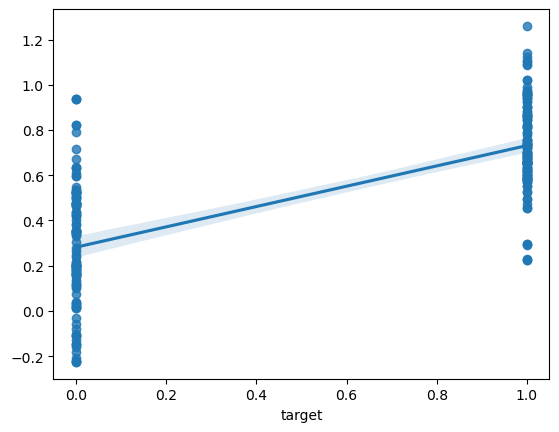

In [79]:
sns.regplot(x=Y_test,y=Y_test_predict)

<Axes: ylabel='Density'>

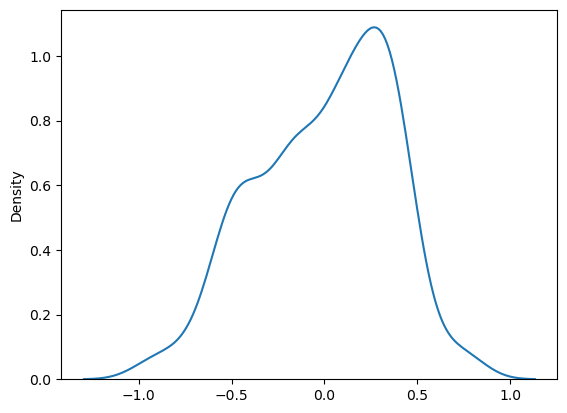

In [80]:
diff=Y_test-Y_test_predict      #finding the error as difference and plotting a kde of it
sns.kdeplot(np.array(diff))  #we can either try histplot here or kdeplot

#also the error we are getting, if it follows a normal distribution menas our model is working very 
#the graph is not like perfect normal distribution graph, showing us that there is some error rate

# Method 2:ORDINAL LEASR SQUARE METHOD(OLS)

In [81]:
X_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268674,0.661504,-0.915755,-0.378869,-0.691104,0.0,0.891255,0.823456,-0.712287,-0.054537,0.995433,1.467285,1.104886
1,-0.158385,0.661504,-0.915755,0.528894,-0.879693,0.0,-1.004049,0.254635,1.403928,1.785457,-2.243675,-0.779958,1.104886
2,1.716520,0.661504,-0.915755,0.831481,-1.487368,0.0,0.891255,-1.058027,1.403928,1.347363,-2.243675,-0.779958,1.104886
3,0.723923,0.661504,-0.915755,1.013034,-0.879693,0.0,0.891255,0.517168,-0.712287,-0.930725,0.995433,0.343664,1.104886
4,0.834212,-1.511706,-0.915755,0.407859,1.027150,0.0,0.891255,-1.889380,-0.712287,0.734031,-0.624121,2.029096,-0.537621
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503346,0.661504,0.055931,0.528894,-0.502515,0.0,0.891255,0.648434,1.403928,-0.930725,0.995433,-0.779958,-0.537621
1021,0.613635,0.661504,-0.915755,-0.378869,0.272795,0.0,-1.004049,-0.357941,1.403928,1.522600,-0.624121,0.343664,1.104886
1022,-0.820116,0.661504,-0.915755,-1.286632,0.629018,0.0,-1.004049,-1.364315,1.403928,-0.054537,-0.624121,0.343664,-0.537621
1023,-0.489251,-1.511706,-0.915755,-1.286632,0.188977,0.0,-1.004049,0.429657,-0.712287,-0.930725,0.995433,-0.779958,-0.537621


In [82]:
#adding a constant col
X1=X_scaled.copy()
X1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268674,0.661504,-0.915755,-0.378869,-0.691104,0.0,0.891255,0.823456,-0.712287,-0.054537,0.995433,1.467285,1.104886
1,-0.158385,0.661504,-0.915755,0.528894,-0.879693,0.0,-1.004049,0.254635,1.403928,1.785457,-2.243675,-0.779958,1.104886
2,1.716520,0.661504,-0.915755,0.831481,-1.487368,0.0,0.891255,-1.058027,1.403928,1.347363,-2.243675,-0.779958,1.104886
3,0.723923,0.661504,-0.915755,1.013034,-0.879693,0.0,0.891255,0.517168,-0.712287,-0.930725,0.995433,0.343664,1.104886
4,0.834212,-1.511706,-0.915755,0.407859,1.027150,0.0,0.891255,-1.889380,-0.712287,0.734031,-0.624121,2.029096,-0.537621


In [83]:
# add a constant means adding intercept value
import statsmodels.api as sm
X1=sm.add_constant(X1)
X1.head()

,const,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.0,-0.268674,0.661504,-0.915755,-0.378869,-0.691104,0.0,0.891255,0.823456,-0.712287,-0.054537,0.995433,1.467285,1.104886
1,1.0,-0.158385,0.661504,-0.915755,0.528894,-0.879693,0.0,-1.004049,0.254635,1.403928,1.785457,-2.243675,-0.779958,1.104886
2,1.0,1.716520,0.661504,-0.915755,0.831481,-1.487368,0.0,0.891255,-1.058027,1.403928,1.347363,-2.243675,-0.779958,1.104886
3,1.0,0.723923,0.661504,-0.915755,1.013034,-0.879693,0.0,0.891255,0.517168,-0.712287,-0.930725,0.995433,0.343664,1.104886
4,1.0,0.834212,-1.511706,-0.915755,0.407859,1.027150,0.0,0.891255,-1.889380,-0.712287,0.734031,-0.624121,2.029096,-0.537621


In [84]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [85]:
OLS_model=smf.OLS(Y,X1)

In [86]:
OLS_result=OLS_model.fit()

In [87]:
OLS_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     95.38
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          6.54e-157
Time:                        15:20:10   Log-Likelihood:                -355.82
No. Observations:                1025   AIC:                             737.6
Df Residuals:                    1012   BIC:                             801.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5132      0.011     47.679      0.000       0.492       0.534
age           -0.0017      0.013     -0.132      0.895      -0.027       0.024
sex           -0.0949      0.012     -8.253      0.000      -0.118      -0.072
cp             0.1105      0.012      9.051      0.000       0.087       0.135
trestbps      -0.0322      0.011     -2.801      0.005      -0.055      -0.010
chol          -0.0273      0.011     -2.377      0.018      -0.050      -0.005
fbs         3.841e-17   1.15e-17      3.327      0.001    1.58e-17    6.11e-17
restecg        0.0206      0.011      1.856      0.064      -0.001       0.042
thalach        0.0652      0.014      4.777      0.000       0.038       0.092
exang         -0.0651      0.013     -5.088      0.000      -0.090      -0.040
oldpeak       -0.0662      0.014     -4.693      0.000      -0.094      -0.038
slope          0.0520      0.014      3.774      0.000       0.025       0.079
ca            -0.1187      0.012     -9.904      0.000      -0.142      -0.095
thal          -0.0736      0.011     -6.433      0.000      -0.096      -0.051
==============================================================================
Omnibus:                       21.267   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.710
Skew:                          -0.338   Prob(JB):                     1.93e-05
Kurtosis:                       2.772   Cond. No.                     1.95e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.57e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#Here for age and restecg the value for p is greater than 0.05(alpha), so we can not reject the null hypothesis for them which says these cols are not significant, means even if we remove these cols are calculate accurcy again it will still be the same
#accuracy is 53%
Dubin-Wayson score is 1.978: Usually the value for thisi is between 0-4. This indicates if there is any multi collinearity. If the value is around 2 then there is full guarantee that there is no multi collinearity. 
But if vaue is more than 2(>2) then there is multi collinearity

In [ ]:
#Let us drop the col age and restecg and check it again

In [88]:
X1.head()

,const,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.0,-0.268674,0.661504,-0.915755,-0.378869,-0.691104,0.0,0.891255,0.823456,-0.712287,-0.054537,0.995433,1.467285,1.104886
1,1.0,-0.158385,0.661504,-0.915755,0.528894,-0.879693,0.0,-1.004049,0.254635,1.403928,1.785457,-2.243675,-0.779958,1.104886
2,1.0,1.716520,0.661504,-0.915755,0.831481,-1.487368,0.0,0.891255,-1.058027,1.403928,1.347363,-2.243675,-0.779958,1.104886
3,1.0,0.723923,0.661504,-0.915755,1.013034,-0.879693,0.0,0.891255,0.517168,-0.712287,-0.930725,0.995433,0.343664,1.104886
4,1.0,0.834212,-1.511706,-0.915755,0.407859,1.027150,0.0,0.891255,-1.889380,-0.712287,0.734031,-0.624121,2.029096,-0.537621


In [90]:
X1.drop(['age','restecg'],axis=1)

,const,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal
0,1.0,0.661504,-0.915755,-0.378869,-0.691104,0.0,0.823456,-0.712287,-0.054537,0.995433,1.467285,1.104886
1,1.0,0.661504,-0.915755,0.528894,-0.879693,0.0,0.254635,1.403928,1.785457,-2.243675,-0.779958,1.104886
2,1.0,0.661504,-0.915755,0.831481,-1.487368,0.0,-1.058027,1.403928,1.347363,-2.243675,-0.779958,1.104886
3,1.0,0.661504,-0.915755,1.013034,-0.879693,0.0,0.517168,-0.712287,-0.930725,0.995433,0.343664,1.104886
4,1.0,-1.511706,-0.915755,0.407859,1.027150,0.0,-1.889380,-0.712287,0.734031,-0.624121,2.029096,-0.537621
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1.0,0.661504,0.055931,0.528894,-0.502515,0.0,0.648434,1.403928,-0.930725,0.995433,-0.779958,-0.537621
1021,1.0,0.661504,-0.915755,-0.378869,0.272795,0.0,-0.357941,1.403928,1.522600,-0.624121,0.343664,1.104886
1022,1.0,0.661504,-0.915755,-1.286632,0.629018,0.0,-1.364315,1.403928,-0.054537,-0.624121,0.343664,-0.537621
1023,1.0,-1.511706,-0.915755,-1.286632,0.188977,0.0,0.429657,-0.712287,-0.930725,0.995433,-0.779958,-0.537621


In [91]:
OLS_model=smf.OLS(Y,X1)

In [92]:
OLS_result_1=OLS_model.fit()

In [95]:
OLS_result_1.summary()        #The accuracy is still the same means age and restecg had no effect on the result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     95.38
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          6.54e-157
Time:                        15:30:20   Log-Likelihood:                -355.82
No. Observations:                1025   AIC:                             737.6
Df Residuals:                    1012   BIC:                             801.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5132      0.011     47.679      0.000       0.492       0.534
age           -0.0017      0.013     -0.132      0.895      -0.027       0.024
sex           -0.0949      0.012     -8.253      0.000      -0.118      -0.072
cp             0.1105      0.012      9.051      0.000       0.087       0.135
trestbps      -0.0322      0.011     -2.801      0.005      -0.055      -0.010
chol          -0.0273      0.011     -2.377      0.018      -0.050      -0.005
fbs         3.841e-17   1.15e-17      3.327      0.001    1.58e-17    6.11e-17
restecg        0.0206      0.011      1.856      0.064      -0.001       0.042
thalach        0.0652      0.014      4.777      0.000       0.038       0.092
exang         -0.0651      0.013     -5.088      0.000      -0.090      -0.040
oldpeak       -0.0662      0.014     -4.693      0.000      -0.094      -0.038
slope          0.0520      0.014      3.774      0.000       0.025       0.079
ca            -0.1187      0.012     -9.904      0.000      -0.142      -0.095
thal          -0.0736      0.011     -6.433      0.000      -0.096      -0.051
==============================================================================
Omnibus:                       21.267   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.710
Skew:                          -0.338   Prob(JB):                     1.93e-05
Kurtosis:                       2.772   Cond. No.                     1.95e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.57e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# LOGISTIC REGRESSION

In [ ]:
# import the algorithm Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression    #importing the LogisticRegression

In [97]:
log_reg=LogisticRegression()

In [98]:
log_reg.fit(X_train,Y_train)    #the model is trained

LogisticRegression()

In [99]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [100]:
Y_train_predict=log_reg.predict(X_train)

In [101]:
Y_train_predict

array([0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 0.

In [102]:
Y_train

199    0.0
307    1.0
137    1.0
943    1.0
639    1.0
      ... 
353    1.0
294    0.0
219    0.0
707    1.0
65     0.0
Name: target, Length: 768, dtype: float64

In [103]:
accuracy_score(Y_train,Y_train_predict)  #with lOgistic the accuracy is 85%

0.8580729166666666

In [104]:
confusion_matrix(Y_train,Y_train_predict)  #300+359 are right prediction and 74+35 are wrong predictions

array([[300,  74],
       [ 35, 359]], dtype=int64)

In [106]:
print(classification_report(Y_train,Y_train_predict))

              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85       374
         1.0       0.83      0.91      0.87       394

    accuracy                           0.86       768
   macro avg       0.86      0.86      0.86       768
weighted avg       0.86      0.86      0.86       768



In [ ]:
#From classifocation report we can read a lot of statistics.
#The accuracy for 1(with disease patients) is 83%, the accuracy for 0(healthy patients) is 90%.
#so all parameters are giving good value for train dataset, so now we chekc for test data

In [ ]:
we do not fit the model again for test data as we have fitted it for train data.

In [107]:
Y_test_predict=log_reg.predict(X_test)

In [108]:
accuracy_score(Y_test,Y_test_predict)   #for testing also accuracy is 85%

0.8599221789883269

In [109]:
confusion_matrix(Y_test,Y_test_predict)

array([[104,  21],
       [ 15, 117]], dtype=int64)

In [110]:
print(classification_report(Y_test,Y_test_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       125
         1.0       0.85      0.89      0.87       132

    accuracy                           0.86       257
   macro avg       0.86      0.86      0.86       257
weighted avg       0.86      0.86      0.86       257



In [111]:
#finding the probability score
probability_score=log_reg.predict_proba(X_test)
probability_score

array([[0.95048478, 0.04951522],
       [0.51930086, 0.48069914],
       [0.02830819, 0.97169181],
       [0.41393191, 0.58606809],
       [0.12220649, 0.87779351],
       [0.1024032 , 0.8975968 ],
       [0.19838894, 0.80161106],
       [0.67411399, 0.32588601],
       [0.49860212, 0.50139788],
       [0.51721436, 0.48278564],
       [0.1024032 , 0.8975968 ],
       [0.377229  , 0.622771  ],
       [0.02281104, 0.97718896],
       [0.39777865, 0.60222135],
       [0.96226003, 0.03773997],
       [0.52145164, 0.47854836],
       [0.1445242 , 0.8554758 ],
       [0.98338019, 0.01661981],
       [0.55844317, 0.44155683],
       [0.97571791, 0.02428209],
       [0.05644296, 0.94355704],
       [0.0217809 , 0.9782191 ],
       [0.28945818, 0.71054182],
       [0.92743029, 0.07256971],
       [0.72828278, 0.27171722],
       [0.69495469, 0.30504531],
       [0.27842758, 0.72157242],
       [0.22510682, 0.77489318],
       [0.22311737, 0.77688263],
       [0.27842758, 0.72157242],
       [0.

In [115]:
Y_test

1000    0.0
255     1.0
568     1.0
854     0.0
628     1.0
       ... 
16      1.0
583     0.0
456     0.0
966     0.0
543     0.0
Name: target, Length: 257, dtype: float64

In [117]:
Y_test_predict


array([0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1.

In [ ]:
#now here the actual state of 2nd patient is 1 but it is predicted as 0(no disease) and if we see the probabilty score for 2nd patient
#it is 0.51930086, 0.48069914, which is very close.
#so to handle such situations also we can decrease the threshold to suppose 0.45 or something
